<a href="https://colab.research.google.com/github/AndreBrusco/graph-pathfinding-algorithms/blob/main/Johnson_Graph_Algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

🎯 Objetivo
Criar um grafo com pesos (inclusive negativos) e aplicar o algoritmo de Johnson para encontrar os caminhos mínimos entre todos os pares.

🔧 Passo 1: Representar o grafo com pesos

In [3]:
import heapq

INF = float('inf')

# Representação do grafo: adjacência com pesos
graph = {
    'A': [('B', 2), ('C', 4)],
    'B': [('C', -3)],
    'C': [('D', 2)],
    'D': [('B', 1)],
}
vertices = list(graph.keys())


📦 Passo 2: Adicionar vértice auxiliar e rodar Bellman-Ford


In [2]:
def bellman_ford(graph, vertices, source):
    dist = {v: INF for v in vertices}
    dist[source] = 0
    for _ in range(len(vertices) - 1):
        for u in graph:
            for v, w in graph[u]:
                if dist[u] + w < dist[v]:
                    dist[v] = dist[u] + w
    # Verifica ciclos negativos
    for u in graph:
        for v, w in graph[u]:
            if dist[u] + w < dist[v]:
                return None  # ciclo negativo detectado
    return dist

# Adiciona vértice auxiliar s
graph['s'] = [(v, 0) for v in vertices]
vertices_with_s = vertices + ['s']

h = bellman_ford(graph, vertices_with_s, 's')
if h is None:
    print("Ciclo negativo detectado!")


🔄 Passo 3: Reponderar as arestas


In [4]:
# Repondera os pesos
reweighted_graph = {}
for u in graph:
    if u == 's':
        continue
    reweighted_graph[u] = []
    for v, w in graph[u]:
        w_prime = w + h[u] - h[v]
        reweighted_graph[u].append((v, w_prime))


🚀 Passo 4: Dijkstra para cada vértice

In [5]:
def dijkstra(graph, source):
    dist = {v: INF for v in graph}
    dist[source] = 0
    pq = [(0, source)]
    while pq:
        d, u = heapq.heappop(pq)
        if d > dist[u]:
            continue
        for v, w in graph.get(u, []):
            if dist[u] + w < dist[v]:
                dist[v] = dist[u] + w
                heapq.heappush(pq, (dist[v], v))
    return dist


🧮 Passo 5: Ajustar resultados finais

In [7]:
# Matriz final de distâncias
johnson_result = {}

for u in vertices:
    dist_prime = dijkstra(reweighted_graph, u)
    johnson_result[u] = {}
    for v in vertices:
        if dist_prime[v] < INF:
            # Corrige reponderação
            johnson_result[u][v] = dist_prime[v] + h[v] - h[u]
        else:
            johnson_result[u][v] = INF


📊 Passo 6: Exibir resultado

In [8]:
print("\nDistâncias mínimas entre todos os pares (Johnson):")
for u in vertices:
    for v in vertices:
        d = johnson_result[u][v]
        print(f"{u} → {v}: {d if d < INF else '∞'}")



Distâncias mínimas entre todos os pares (Johnson):
A → A: 0
A → B: 2
A → C: -1
A → D: 1
B → A: ∞
B → B: 0
B → C: -3
B → D: -1
C → A: ∞
C → B: 3
C → C: 0
C → D: 2
D → A: ∞
D → B: 1
D → C: -2
D → D: 0


#Resultado Final: Exemplo de Construção passo a passo do Algoritmo:


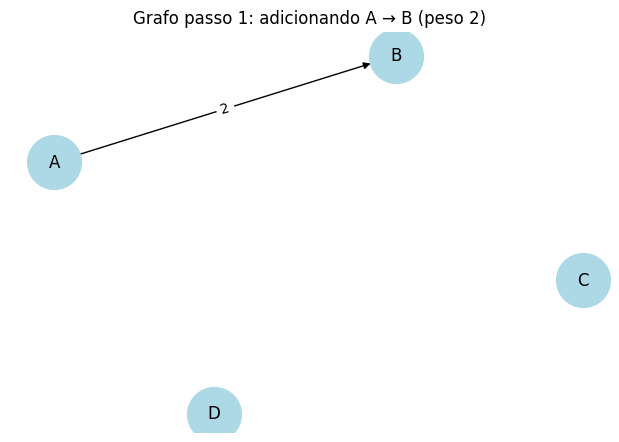

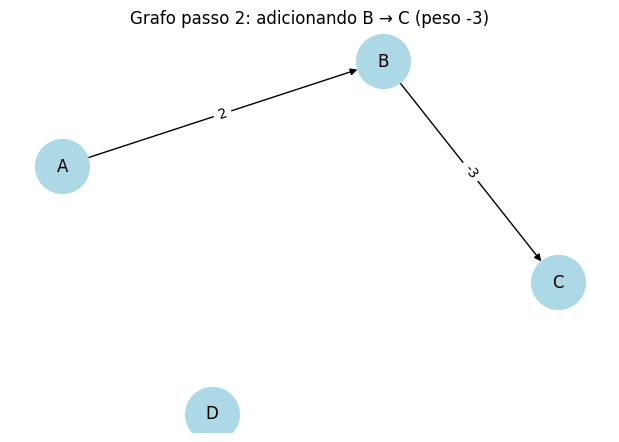

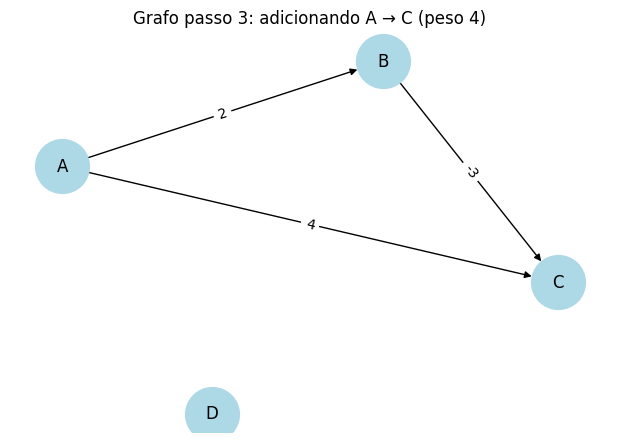

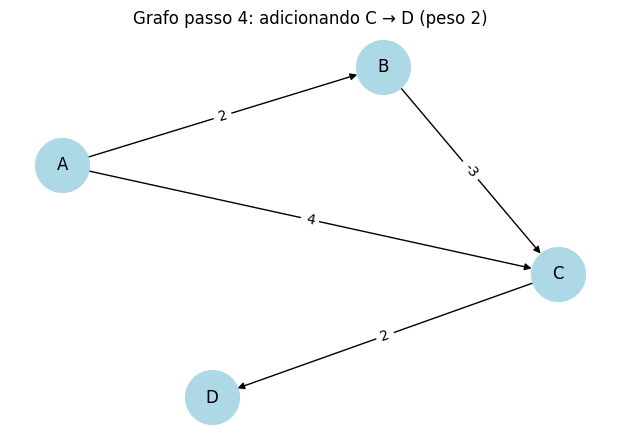

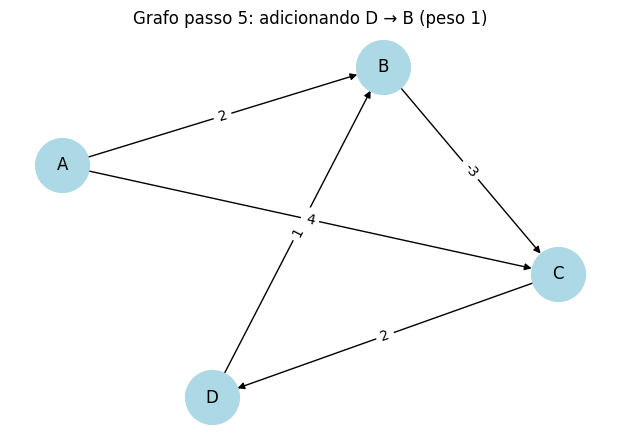

In [10]:
import networkx as nx
import matplotlib.pyplot as plt
import time

# Define lista de arestas com pesos
edges = [
    ('A', 'B', 2),
    ('B', 'C', -3),
    ('A', 'C', 4),
    ('C', 'D', 2),
    ('D', 'B', 1)
]

# Cria grafo direcionado
G = nx.DiGraph()

# Posição fixa dos nós para estabilidade visual
nodes = set(sum(([u, v] for u, v, _ in edges), []))
G.add_nodes_from(nodes)
pos = nx.spring_layout(G, seed=42)

# Loop para adicionar uma aresta por vez
for i, (u, v, w) in enumerate(edges):
    G.add_edge(u, v, weight=w)

    plt.figure(figsize=(6, 4))
    nx.draw(G, pos, with_labels=True, node_size=1500, node_color='lightblue', arrows=True)
    labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

    plt.title(f"Grafo passo {i+1}: adicionando {u} → {v} (peso {w})")
    plt.show()

    time.sleep(1)  # Pequena pausa entre passos
